<a href="https://colab.research.google.com/github/onsimini/python-playground/blob/main/kalman-filter/kalman-filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kalman filter (std - linear)

---

The Kalman filter is based on the gaussian distribution to estimate the probability of a position. And the probability that the position is between x1 and x2 is:

> ![p\({x_1}<{x}<{x_2}\)](https://latex.codecogs.com/svg.latex?p\({x_1}<x<{x_2}\)=\int_{x_1}^{x_2}f_x(x)dx)

The gaussian is characterized by two parameters:

* Mean   μ (![mu](https://latex.codecogs.com/svg.latex?\mu))
* Variance  σ²  (![sigma^2](https://latex.codecogs.com/svg.latex?\sigma^2))

And we represent it as :

> ![N(x:\mu,\sigma^2)](https://latex.codecogs.com/svg.latex?N(x:\mu,\sigma^2))




sigma = 1.0.


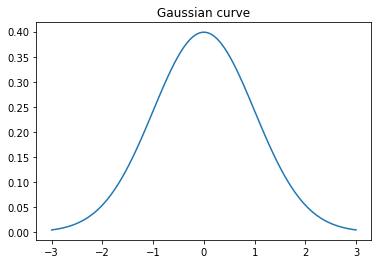

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

mu = 0
variance = 1
sigma = math.sqrt(variance)
print(f'sigma = {sigma}.')

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.title('Gaussian curve')
plt.show()

The formula for the Gaussian distribution is printed below. Notice that the formula contains an exponential of a quadratic function. The quadratic compares the value of x to μ, and in the case that x=μ, the exponential is equal to 1 (e^0 = 1e 
0
 =1). You’ll note here, that the constant in front of the exponential is a necessary normalizing factor.



### 2 states process :

1. Mesurement update
2. State prediction

With a Initial guess.

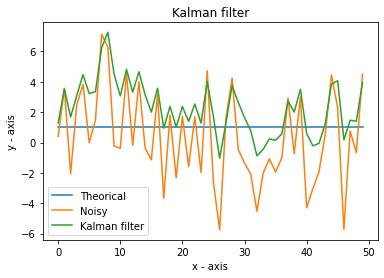

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

##########################################
##          Kalman filter               ##
##########################################
SAMPLE = 50
# Sampling freq
x = [x for x in range(SAMPLE)]
# Initial state
mu = 0
sig = 10
# Constant motion
# motion = [1,1,2,1,1]
motion = [1]*SAMPLE
motion_sig = 2
# Mesurements
# mesure = [5, 6, 7, 9, 10]
mesure = [val+np.random.normal(0,3) for val in motion]
mesure_sig = 4
filtered = []

def measurement_update(prior_mean, prior_var, measure_mean, measure_var):
  new_mean = ((measure_var * prior_mean 
              + prior_var * measure_mean) 
             / (prior_var + measure_var))
  new_var = 1/ ((1/prior_var)+(1/measure_var));
  # print([new_mean,new_var])
  return [new_mean,new_var]

def state_prediction(mean1, var1, mean2, var2):
  new_mean = mean1 + mean2
  new_var = var1 + var2
  # print([new_mean,new_var])
  return [new_mean,new_var]

for i in range(SAMPLE):
  [mu, sig] = measurement_update(mu, sig, mesure[i], mesure_sig)
  [mu, sig] = state_prediction(mu, sig, motion[i], motion_sig)
  filtered.append(mu)

# print(filtered)
###########################################
# plotting the points
plt.plot(x, motion, label = "Theorical")
plt.plot(x, mesure, label = "Noisy")
plt.plot(x, filtered, label = "Kalman filter")
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('Kalman filter')
plt.legend() 
plt.show()
###########################################
